In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

torch.__version__

'2.5.1'

In [2]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias


X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
#creating train test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [4]:
def plot_predictions(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = None):

    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c = 'b', s = 4, label = 'training data')
    plt.scatter(test_data, test_labels, c = 'g', s = 4, label = 'test data')

    if predictions is not None:
        plt.scatter(test_data, predictions, c = 'r', s = 4, labels = 'predictions')

    plt.legend(prop={'size': 14});

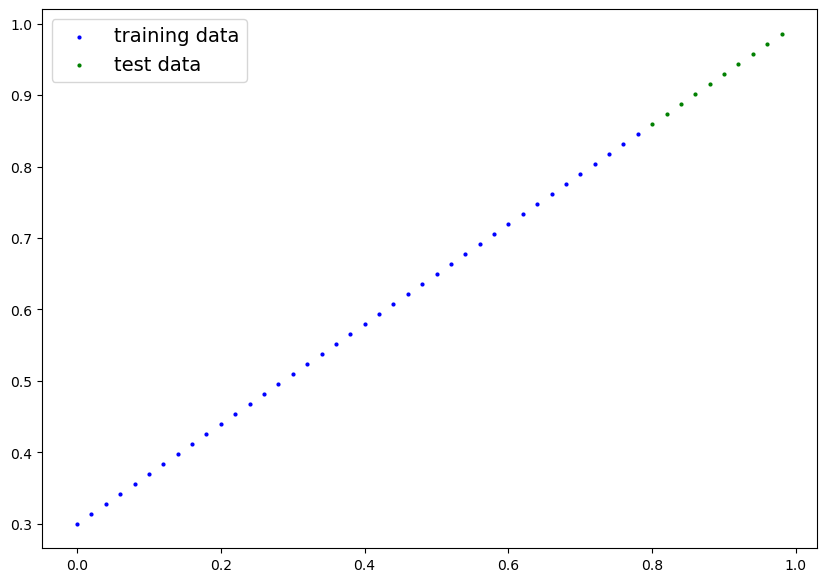

In [5]:
plot_predictions()

In [6]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                               dtype = torch.float,
                                               requires_grad = True))

        self.bias = nn.Parameter(torch.randn(1,
                                            dtype = torch.float,
                                            requires_grad = True))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [7]:
# creating a randome seed
torch.manual_seed(42)

# creating the instance of the model LinearRegressionModel
model_0 = LinearRegressionModel()

#checking the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [8]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [9]:
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [10]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
# setting up the loss function
loss_fn = nn.L1Loss()

# setting up the optimizer, using stochastic gradient descent
optimizer = torch.optim.SGD(params = model_0.parameters(), # we are optimizing the parameters of our model with SGD
                           lr = 0.01) # lr is the learning rate of model, it takes the 0.01 step for finding the best parameters, it is an hyperparameter

In [13]:
torch.manual_seed(42)

# an epoch is one loop through the data
epoch = 200

# tracking the different values
epoch_count = []
loss_values = []
test_loss_values = []

## training the model:
for epoch in range(epoch):
    model_0.train()

    y_pred = model_0(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()
    with torch.inference_model():
        test_pred = model_0(X_test)

        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f'epoch: {epoch} | loss: {loss} | test loss: {test_loss}')
        print(model_0.state_dict())

In [ ]:
np.array(torch.tensor(loss_values).numpy()), test_loss_values

In [ ]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = 'Train loss')
plt.plot(epoch_count, test_loss_values, label = 'Test loss')
plt.title('Training and test loss curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend();

In [ ]:
with torch.inference_model():
    y_preds_new = model_0(X_test)

In [ ]:
model_0.state_dict()

In [ ]:
weight, bias

In [ ]:
plot_predicitons(predictions = y_preds);

In [ ]:
plot_predictions(predictions = y_preds_new);

In [ ]:
from pathlib import path

MODEL_PATH = path("models")
MODEL_PATH.mkdir(parents = True, exit_ok = True)

MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH =MODEL / MODEL_NAME

print(f'saving model to: {MODEL_SAVE_PATH}')
torch.save(obj = model_0.state_dict(),
          f = MODEL_SAVE_PATH)


In [ ]:
!ls -l models

In [ ]:
model_0.state_dict()

In [ ]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

In [ ]:
loaded_model_0.state_dict()

In [ ]:
loaded_model_0.eval()
with torch.inference_model():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

In [ ]:
model_0.eval()
with torch.inference_model():
    y_preds = model_0(X_test)

y_preds

In [ ]:
y_preds ==loaded_model_preds

In [ ]:
device = 'cuda' if torch.cuda.is_avialable() else 'cpu'
print(f'using device: {device}')

In [ ]:
weight = 0.7
bias = 0.3 

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias
X[:10], y[:10]

In [ ]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split]
len(X_train), len(y_train), len(X_test), len(y_test)

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predicions = None):

    plt.figure(figsize = (10, 7))
    
    plt.scatter(train_data, train_labels, c = 'b', s = 4, label = 'Training data')
    
    plt.scatter(test_data, test_labels, c = 'g', s = 4, label = 'Testing data')
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c = 'r', s = 4, label = 'Predicitions')

    plt.legend(prop = {'size': 14})

In [ ]:
plot_predictions(X_train, y_train, X_test, y_test)

In [ ]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features = 1,
                                      out_features = 1)

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

torch.manual_seed(42)


In [ ]:
model_1.state_dict()

In [ ]:
X_train[:5], y_train[:5]

In [ ]:
next(model_1.parameters()).device

In [ ]:
model_1.to(device)
next(model_1.parameters().device)

In [ ]:
model_1.state_dict()

In [ ]:
weight, bias

In [ ]:
model_1.eval()

with torch.inference_model():
    y_preds = model_1(X_test)

y_preds

In [ ]:
plot_predictions(predictions = y_preds.cpu())

In [ ]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f'saving model to : {MODEL_SAVE_PATH}')
torch.save(obj = model_1.state_dict(),
          f = MODEL_SAVE_PATH)

In [ ]:
model_1.state_dict()

In [ ]:
loaded_model_1 = LinearRegressionModelV2()

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(device)

In [ ]:
next(loaded_model1.parameters()).device

In [ ]:
loaded_model_1.state_dict()

In [ ]:
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds